In [1]:
import sys
sys.path.append('..')  # 匯入父目錄檔案的設定
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

In [2]:
window_size = 1 #context window size
hidden_size = 5 #中間層NN數量
batch_size = 3  #data分成三批做training
max_epoch = 1000 #

### 準備語料庫 (corpus): You say YES but I say No

In [3]:
text = 'You say YES but I say No.'
corpus, word_to_id, id_to_word = preprocess(text)
print("語料庫 corpus: %s"%(id_to_word))

語料庫 corpus: {0: 'you', 1: 'say', 2: 'yes', 3: 'but', 4: 'i', 5: 'no', 6: '.'}


In [5]:
vocab_size = len(word_to_id)
print("詞彙長度: %s"%(vocab_size))

詞彙長度: 7


### 建立上下文 (contexts) 與 目標(target)

In [6]:
contexts, target = create_contexts_target(corpus, window_size)
print("上下文陣列：\n%s "%(contexts))
print("預測目標陣列： %s"%(target))

上下文陣列：
[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]] 
預測目標陣列： [1 2 3 4 1 5]


### target 轉成one-hot encoding

In [7]:
target = convert_one_hot(target, vocab_size)
print("one-hot encoding:\n%s"%(target))

one-hot encoding:
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


### contexts 轉成one-hot encoding

In [8]:
contexts = convert_one_hot(contexts, vocab_size)
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)

### 建立CBOW model

In [9]:
model = SimpleCBOW(vocab_size, hidden_size)
print("CBOW model:\n%s"%(model))

CBOW model:


### 學習優化器(Optimizer) 使用 Adam 演算法

In [10]:
optimizer = Adam()
optimizer

### Trainer 進行類神經網路的學習
#### 資料 -> 類神經網路 -> 計算梯度 -> 將計算的梯度給optimizer 更新參數

In [11]:
trainer = Trainer(model, optimizer)

In [12]:
trainer.fit(contexts, target, max_epoch, batch_size)

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

| epoch 397 |  iter 1 / 2 | time 0[s] | loss 0.89
| epoch 398 |  iter 1 / 2 | time 0[s] | loss 0.68
| epoch 399 |  iter 1 / 2 | time 0[s] | loss 0.91
| epoch 400 |  iter 1 / 2 | time 0[s] | loss 0.70
| epoch 401 |  iter 1 / 2 | time 0[s] | loss 0.78
| epoch 402 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 403 |  iter 1 / 2 | time 0[s] | loss 0.83
| epoch 404 |  iter 1 / 2 | time 0[s] | loss 0.83
| epoch 405 |  iter 1 / 2 | time 0[s] | loss 0.66
| epoch 406 |  iter 1 / 2 | time 0[s] | loss 0.90
| epoch 407 |  iter 1 / 2 | time 0[s] | loss 0.59
| epoch 408 |  iter 1 / 2 | time 0[s] | loss 0.91
| epoch 409 |  iter 1 / 2 | time 0[s] | loss 0.76
| epoch 410 |  iter 1 / 2 | time 0[s] | loss 0.82
| epoch 411 |  iter 1 / 2 | time 0[s] | loss 0.71
| epoch 412 |  iter 1 / 2 | time 0[s] | loss 0.72
| epoch 413 |  iter 1 / 2 | time 0[s] | loss 0.95
| epoch 414 |  iter 1 / 2 | time 0[s] | loss 0.57
| epoch 415 |  iter 1 / 2 | time 0[s] | loss 0.84
| epoch 416 |  iter 1 / 2 | time 0[s] | loss 0.70


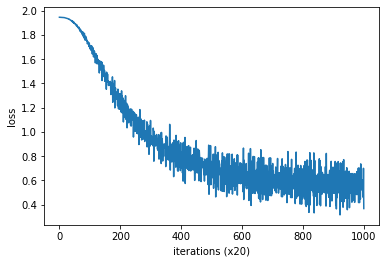

In [13]:
trainer.plot()

### 顯示稠密向量，即字詞的分散式表示
### 表示 '詞意' 的向量

In [14]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 1.0335232 -1.2668074 -1.2028143 -1.1949946  1.031267 ]
say [-1.2070224   0.30706877  0.1792709   1.187787   -1.2223872 ]
yes [ 0.7501436  -0.70887715 -0.8202366  -0.60710144  0.74368536]
but [-0.9781442   1.5268718  -1.8710485   0.9805358  -0.99415004]
i [ 0.7806619 -0.7234509 -0.8262916 -0.6146687  0.7514682]
no [ 1.0155138 -1.2708426 -1.1990079 -1.1809301  1.0127821]
. [-1.1084222 -1.5467365  1.398434   1.0401461 -1.0866137]
